# opencv_distotion
 code
 
## sadfasdf

asdf
asdfasdf
asdfasdf

In [ ]:
import cv2
import numpy as np
import os

# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Define the size of each square in millimeters
square_size = 40

# Define the dimensions of the checkerboard in terms of squares
num_rows = 24
num_cols = 49

# Prepare object points for a 25x30 checkerboard with 40mm squares
objp = np.zeros((num_cols * num_rows, 3), np.float32)
objp[:, :2] = np.mgrid[0:num_rows, 0:num_cols].T.reshape(-1, 2) * square_size

# Arrays to store object points and image points from all the images.
objpoints = []  # 3D points in real-world space
imgpoints = []  # 2D points in the image plane.

image_dir = 'C:/MLOptic/Distortion Scripts/binned_images4'
image_files = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.startswith('binned_smallcheckerboard') and fname.endswith('.tif')]

# Loop through image names
for fname in image_files:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, (num_rows, num_cols), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)

        # Create a copy of the image to avoid modifying the original
        marked_img = img.copy()

        # Draw marker circles at the detected corners and scale them down
        for corner in corners2:
            x, y = corner[0]
            marker_radius = 3  # Set the initial marker radius
            cv2.circle(marked_img, (int(x), int(y)), marker_radius, (0, 0, 255), -1)  # -1 fills the circle

        # Display the modified image with smaller markers
        cv2.imshow('img', cv2.resize(marked_img, (0, 0), fx=1, fy=1))
        cv2.waitKey(500)

cv2.destroyAllWindows()

# Define calibration flags to match MATLAB settings
flags = (
    cv2.CALIB_RATIONAL_MODEL |  # Enable rational polynomial distortion model for high distortion
    cv2.CALIB_FIX_K4 |
    cv2.CALIB_FIX_K5 |
    cv2.CALIB_FIX_K6  # Fix third radial distortion coefficient to 0
)

# Perform camera calibration with flags
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None, flags=flags)

# Print the camera matrix (intrinsic matrix)
print("Camera Matrix:")
print(mtx)

# Print the distortion coefficients
print("Distortion Coefficients:")
print(dist)

# Calculate and print the reprojection error and maximum projection error
mean_error = 0
max_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2)
    mean_error += error
    max_error = max(max_error, error)

print("Reprojection Error: {:.4f}".format(mean_error / len(objpoints)))
print("Max Projection Error: {:.4f}".format(max_error))

# Load the distorted image
img = cv2.imread('C:/Users/KallyChen/Desktop/Distortion Scripts/binned_images4/binned_distorted.tif')

# Get the dimensions of the distorted image
h, w = img.shape[:2]

# Compute the new camera matrix based on the new size
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 0, (w, h))

# Undistort the image
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
gray_dst = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

# Crop the undistorted image based on the ROI
x, y, w, h = roi
dst = dst[y:y + h, x:x + w]

output_directory = 'C:/Users/KallyChen/Desktop/Distortion Scripts/binned_images4/'
output_path = os.path.join(output_directory, 'binned_undistorted.tif')
cv2.imwrite(output_path, gray_dst)


In [1]:
! pip list

Package                       Version
----------------------------- ---------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8

In [2]:
! python --version

Python 3.11.5


In [5]:
% lsmagic

UsageError: Line magic function `%` not found.


In [6]:
import pandas as pd
import numpy as np%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %code_wrap  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  

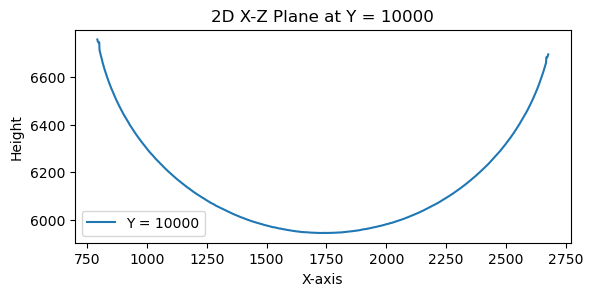

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plot_2d_plane(X, heights, y_value):
    # Find the index corresponding to the specified Y-value
    y_index = np.argmin(np.abs(np.arange(1, heights.shape[0] + 1) - y_value))

    # Extract the X and Z values for the plane
    x_values = X[y_index, :]
    z_values = heights[y_index, :]
    
    # Create the 2D plot
    plt.figure()
    plt.plot(x_values, z_values, label=f'Y = {y_value}')

    # Set the aspect of the plot to be equal, ensuring same magnification for X and Z axes
    plt.gca().set_aspect('equal', adjustable='box')

    # Set labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Height')
    plt.title(f'2D X-Z Plane at Y = {y_value}')

    # Display legend
    plt.legend()

    # Show the plot
    plt.show()
        
    
def read_data(file_path):
    df = pd.read_csv(file_path)
    return df


def preprocess_data(df, threshold_min=-1, threshold_max=1):
    df[(df < threshold_min) | (df > threshold_max)] = np.nan
    return df
    
    
    
file_path = r'C:\MLOptic\Keyence\LJ data\smartMTF1.csv'
df = read_data(file_path)
df_processed = preprocess_data(df)
heights = (2.87 - df_processed.values) * 25400 / 12.5
    
x, y = range(1, heights.shape[1] + 1), range(1, heights.shape[0] + 1)
x_grid, y_grid = np.meshgrid(x, y)
    
    
    
plot_2d_plane(x_grid, heights, 10000)

In [6]:
%pwd

'C:\\Python\\Jupyter Notebook'

![asd](https://th.bing.com/th/id/OIP.8mTJqNhZVQaEagOgCJ5uJQHaEK?rs=1&pid=ImgDetMain)

$y=x^2$

In [1]:
pip install pygame

Note: you may need to restart the kernel to use updated packages.
